# Information of Dry Bean Dataset

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Attribute Information:
1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV

# Exploratory Data Analysis

## Initial Data Exploration

To better understand the *Dry Bean* dataset, an initial exploration was conducted.

- The `head()` function was used to display the first 5 rows of the dataset to get an overview of the structure and features.
- The `info()` function was used to obtain general information about the dataset, including the number of samples, number of features, data types, and any missing values.
- The `describe()` function was applied to obtain statistical summary of the dataset, including mean, standard deviation, minimum and maximum values, and other statistical measures for each feature.

Finally, to ensure there were no duplicate records, the `duplicated()` function was used, and if any duplicates were found, they were removed using `drop_duplicates()`.


In [2]:
dry_bean = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [3]:
dry_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
dry_bean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
dry_bean.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [6]:
if dry_bean.duplicated().sum() != 0:
    dry_bean.drop_duplicates(inplace=True)

## Class Distribution in the Dataset

In this section, we analyze the number of samples for each class in the *Dry Bean* dataset. The table below presents the sample count and percentage for each bean type:

| Bean Class  | Sample Count | Percentage (%) |
|-------------|-------------|--------------|
| DERMASON  | 3546 | 26.2% |
| SIRA      | 2636 | 19.5% |
| SEKER     | 2027 | 15.0% |
| HOROZ     | 1860 | 13.7% |
| CALI      | 1630 | 12.0% |
| BARBUNYA  | 1322 | 9.8% |
| BOMBAY    | 522  | 3.9%  |

As observed, the **DERMASON** class has the highest number of samples (26.2%), while the **BOMBAY** class has the lowest (3.9%).  

Considering these percentages, **this dataset is unbalanced**. Class imbalance may cause the machine learning model to **favor majority classes**, leading to poor classification performance for minority classes. To address this issue, techniques such as **Oversampling** (increasing minority class samples) or **Undersampling** (reducing majority class samples) can be applied.


In [7]:
dry_bean["Class"].value_counts()


Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

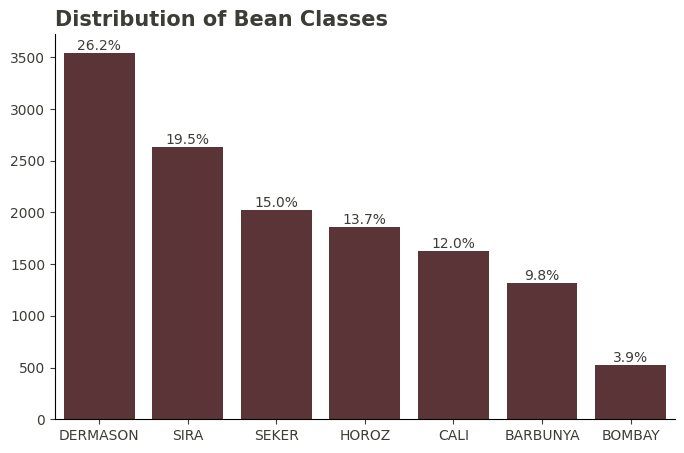

In [8]:
class_counts = dry_bean["Class"].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.countplot(x=dry_bean["Class"], color='#612E32', order=class_counts.index)

plt.title(
    "Distribution of Bean Classes",
    weight="bold",
    color="#3C3D37",
    fontsize=15,
    loc="left",
)
plt.xlabel(
    None,
    color="#3C3D37",
)
plt.ylabel(
    None,
    color="#3C3D37",
)

total = len(dry_bean)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 30, f'{percentage:.1f}%', 
            ha="center", color="#3C3D37", fontsize=10)

sns.despine()
plt.tick_params(axis='x', colors='#3C3D37')
plt.tick_params(axis='y', colors='#3C3D37')
plt.show()

## Feature Distribution and Boxplots

Histograms were plotted to examine the distribution of each feature, allowing us to observe the spread of the data. Boxplots were then used to compare the distribution of features across different classes, helping us understand the data distribution, median values, and outliers in each class.


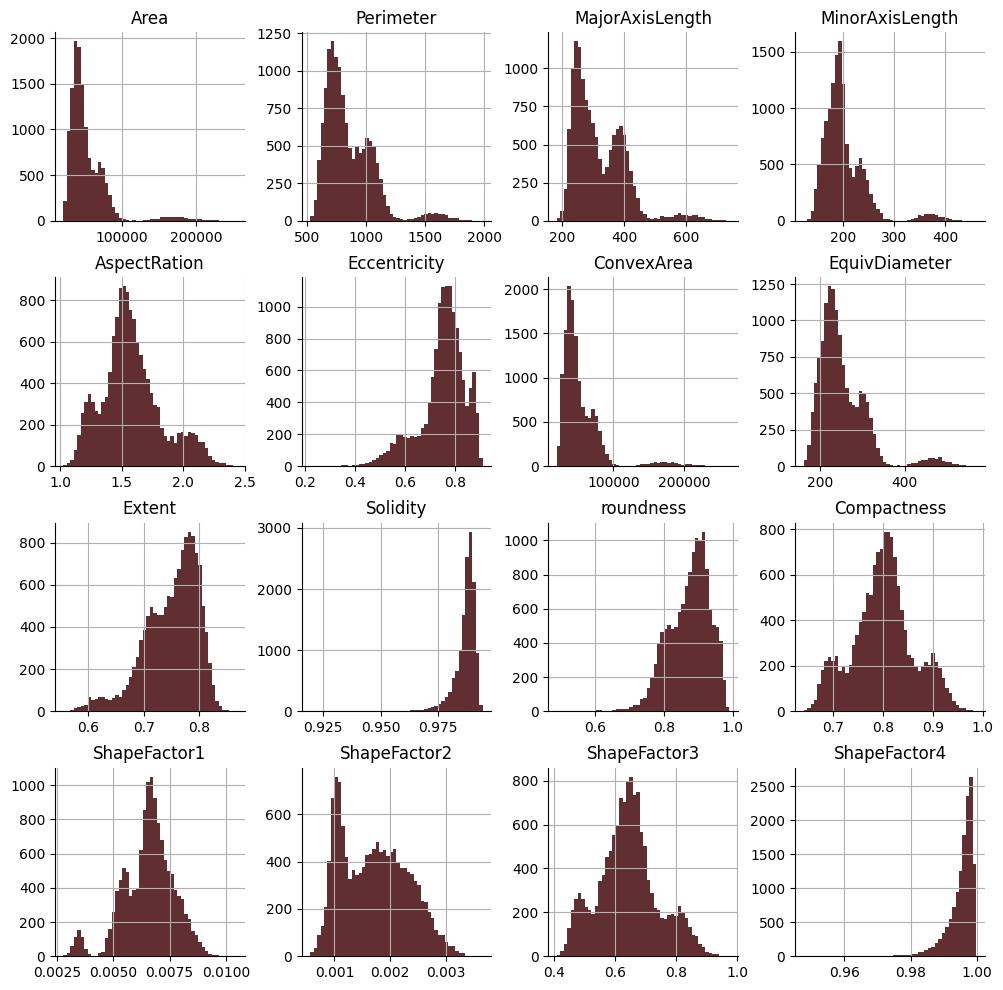

In [9]:
dry_bean.hist(figsize=(12, 12), bins=50, color='#612E32')
sns.despine()
plt.show()

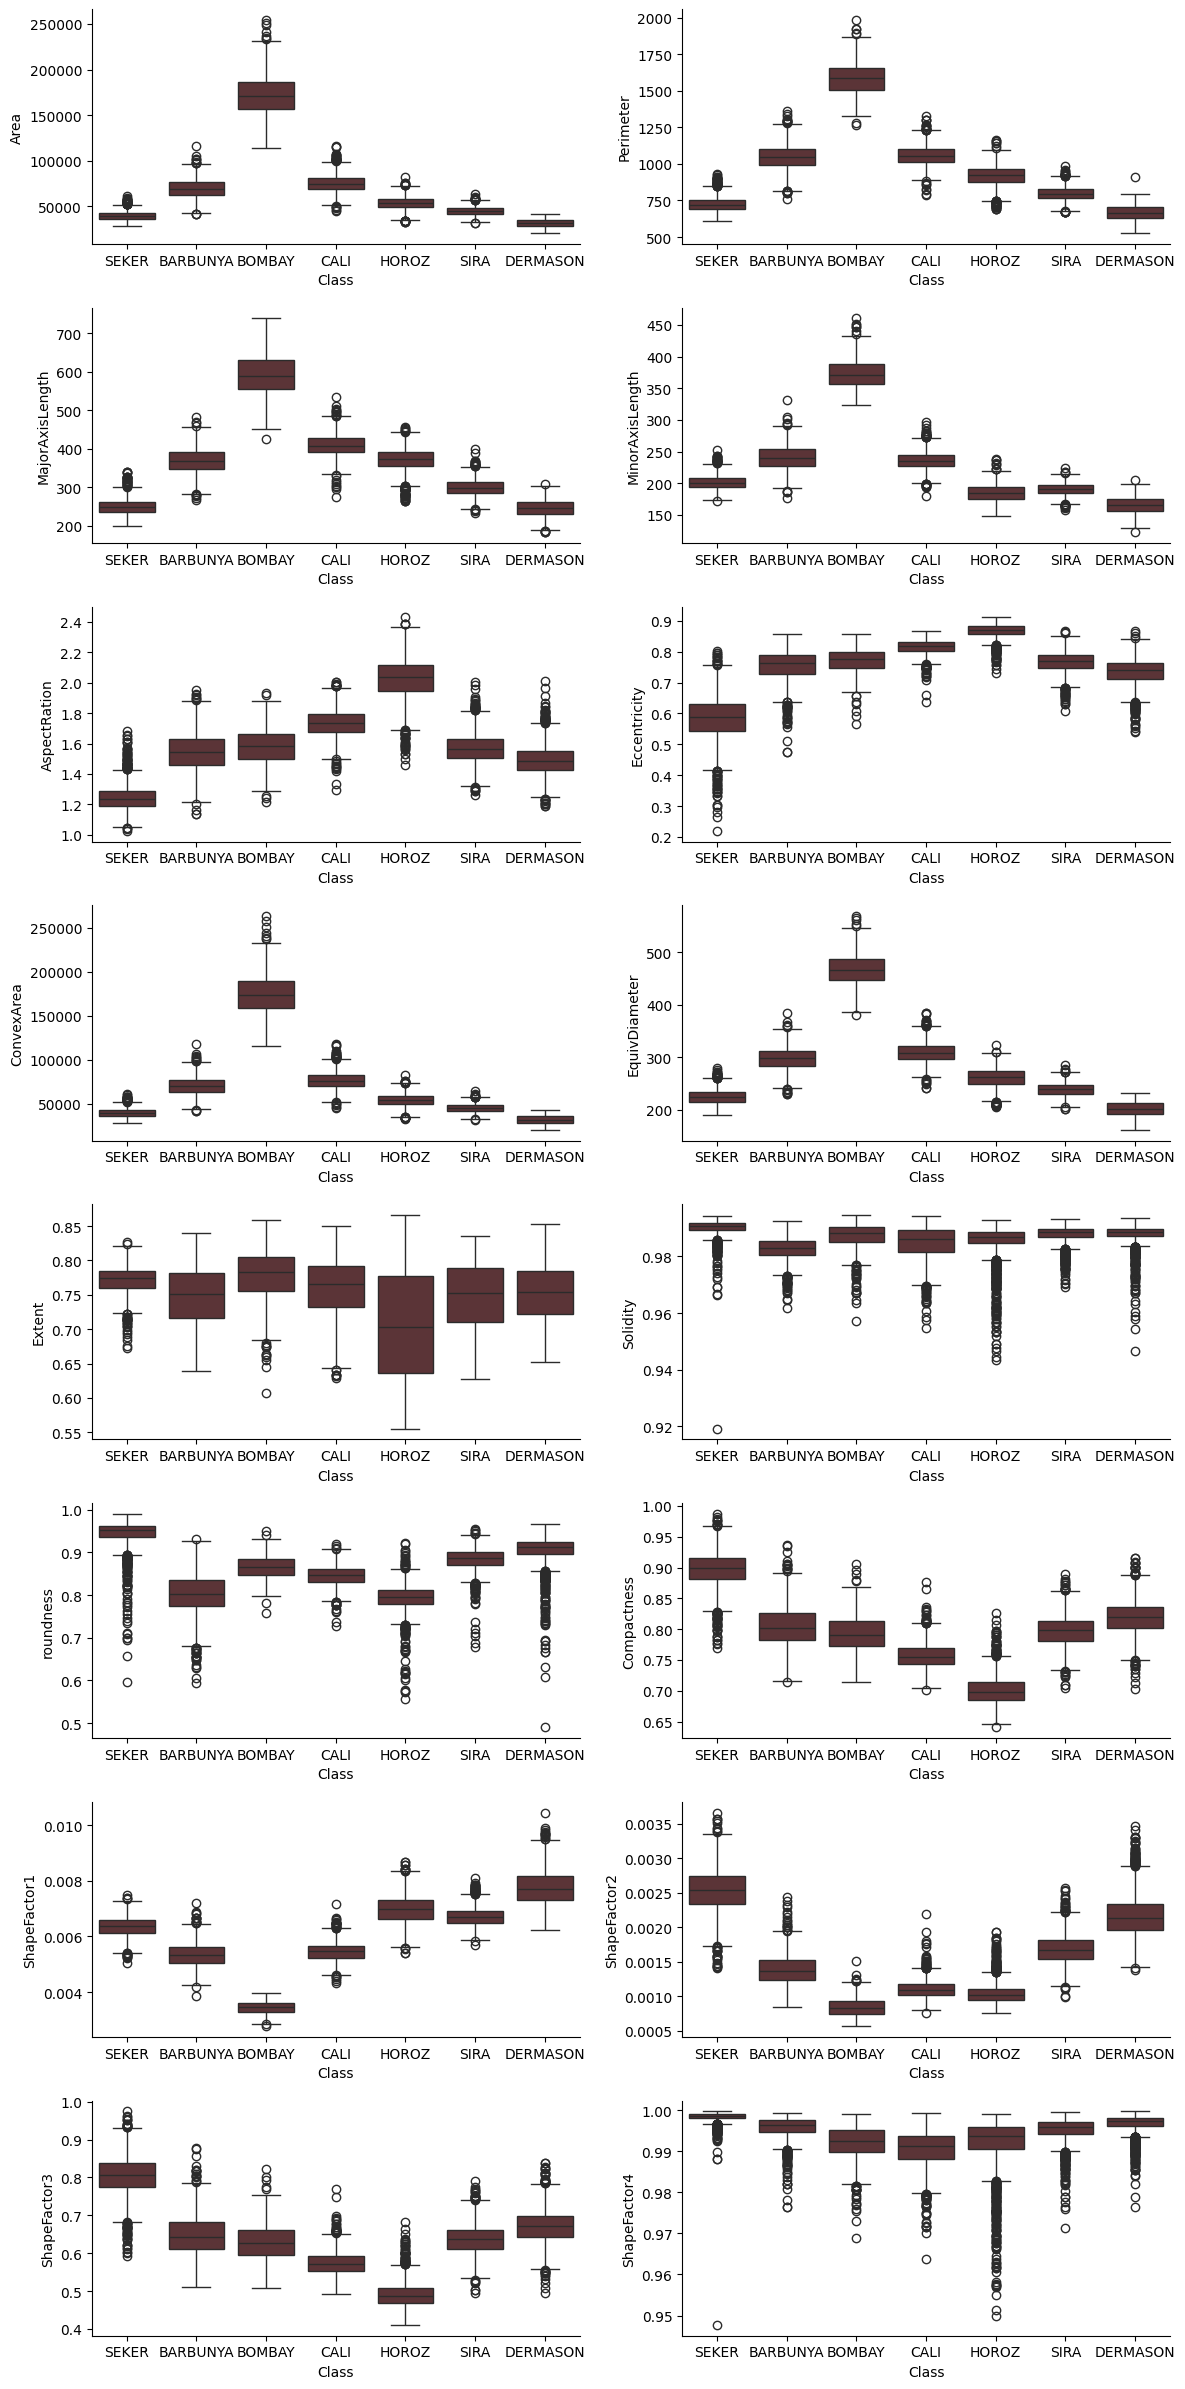

In [10]:
Numeric_cols = dry_bean.drop(columns=['Class']).columns
fig, ax = plt.subplots(8, 2, figsize=(12, 24))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=dry_bean['Class'], y= dry_bean[variable], ax=subplot, color='#612E32')
    sns.despine()
plt.tight_layout()

## Analysis of Perimeter and Solidity Features

In this section, comparative analyses of the **Perimeter** and **Solidity** features across different classes were performed.

- For the **Perimeter** feature, the mean value was calculated for each class, and the classes were sorted based on the largest **Perimeter** values. This helps identify which classes have the largest perimeter.
  
- For the **Solidity** feature, similar to **Perimeter**, the mean value was calculated for each class, and the classes were sorted based on the highest **Solidity** values. This analysis shows which classes have the highest solidity.



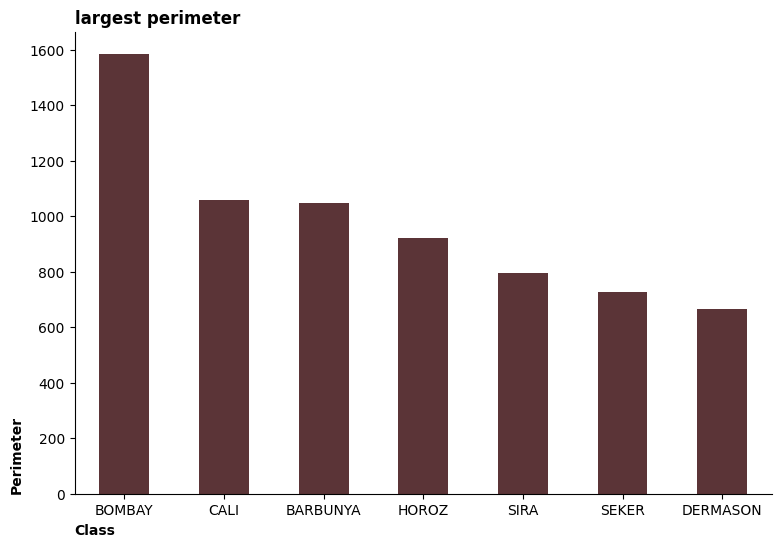

In [11]:
perimeter = (
    dry_bean.groupby("Class")["Perimeter"]
    .agg("mean")
    .reset_index()
    .sort_values(by="Perimeter", ascending=False)
)
plt.figure(figsize=(9, 6))
sns.barplot(data=perimeter, x="Class", y="Perimeter", color='#612E32', width=0.5)
plt.title("largest perimeter", loc="left", fontdict={"size": 12, "weight": "bold"})
plt.xlabel("Class", loc="left", fontdict={"weight": "bold"})
plt.ylabel("Perimeter", loc="bottom", fontdict={"weight": "bold"})
plt.gca().spines[["top", "right"]].set_visible(False)

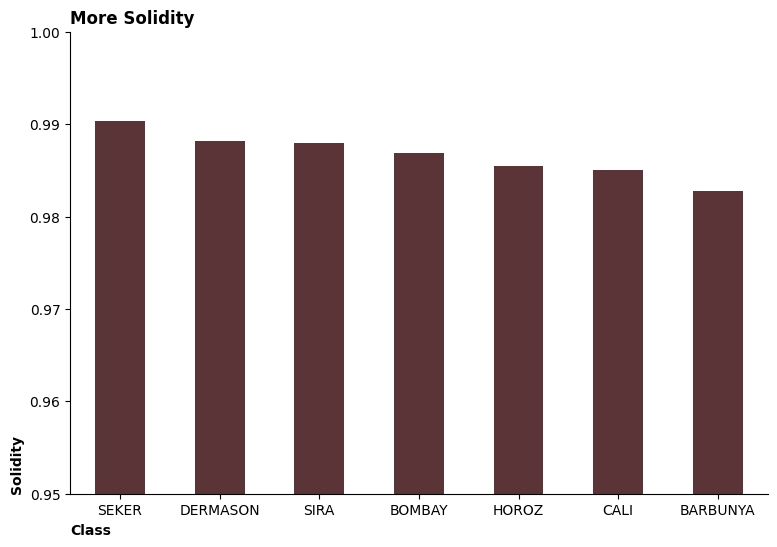

In [12]:
solidity = (
    dry_bean.groupby("Class")["Solidity"]
    .agg("mean")
    .reset_index()
    .sort_values(by="Solidity", ascending=False)
)

plt.figure(figsize=(9, 6))
sns.barplot(data=solidity, x="Class", y="Solidity", color='#612E32', width=0.5)
plt.title("More Solidity", loc="left", fontdict={"size": 12, "weight": "bold"})
plt.xlabel("Class", loc="left", fontdict={"weight": "bold"})
plt.ylabel("Solidity", loc="bottom", fontdict={"weight": "bold"})
plt.ylim(0.95, 1)
plt.gca().spines[["top", "right"]].set_visible(False)

# Feature Engineering

## Encoding Classes to Numeric Values

In this section, **LabelEncoder** was used to convert class names into numeric values. This allows each class to be represented by a unique number, making it suitable for machine learning models. A **class-to-number mapping dictionary** was also created to allow for reverse conversion.


In [13]:
encoder = LabelEncoder()

In [14]:
dry_bean["Class_num"] = encoder.fit_transform(dry_bean["Class"])
dry_bean[["Class_num", "Class"]] 

,Class_num,Class
0,5,SEKER
1,5,SEKER
2,5,SEKER
3,5,SEKER
4,5,SEKER
...,...,...
13606,3,DERMASON
13607,3,DERMASON
13608,3,DERMASON
13609,3,DERMASON


In [15]:
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(class_mapping)

{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


## Feature Selection

In this section, we select the most important features for training the models using correlation and algorithms, along with criteria for feature selection.

### Feature Selection Based on Correlation

In this section, the correlation matrix for the dataset features was plotted. Then, features with more than 99% correlation with each other were identified. The following pairs of features showed high correlation:
- **Area** and **Perimeter**
- **ConvexArea** and **EquivDiameter**
- **Compactness** and **ShapeFactor3**

Finally, from these pairs, the feature that had a higher average correlation with other features and a lower correlation with the **final class** was removed. The removed features are: **'Area'**, **'EquivDiameter'**, and **'Compactness'**.


In [16]:
corr_matrix = dry_bean.drop('Class_num', axis=1).corr(numeric_only=True)

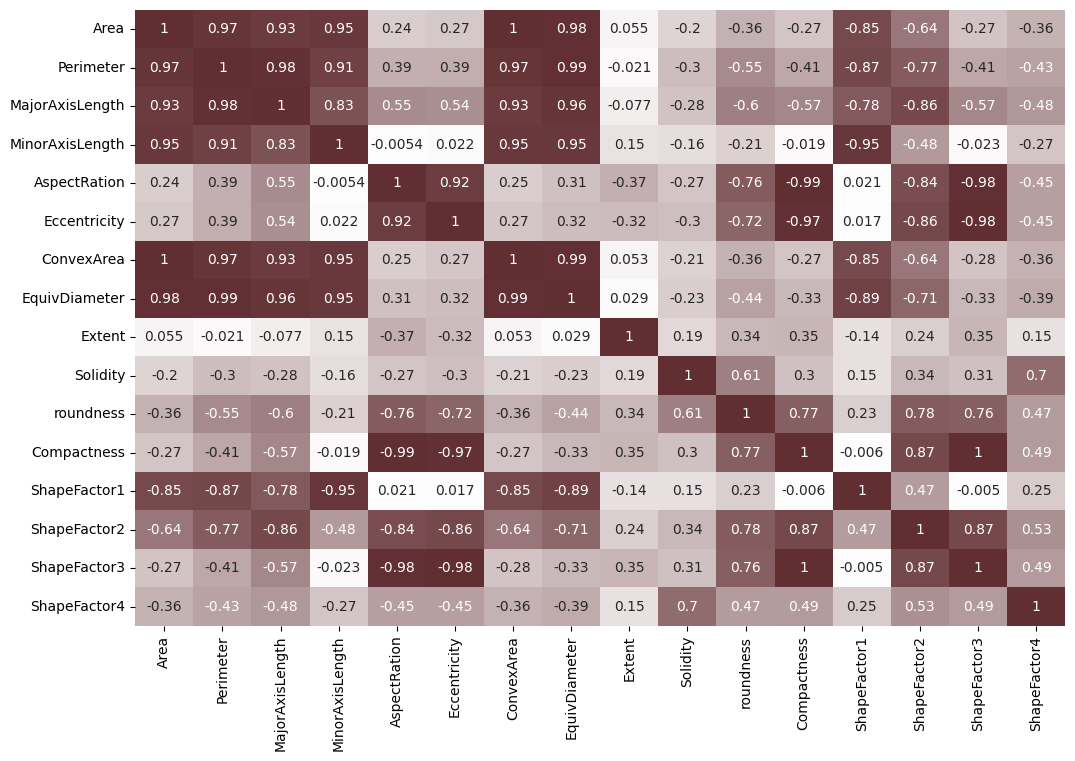

In [17]:
plt.figure(figsize=(12, 8))
colors1 = ["#612E32", "white", "#612E32"]
custom_cmap1 = LinearSegmentedColormap.from_list("custom_cmap", colors1)
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap1, cbar=False)
plt.show()

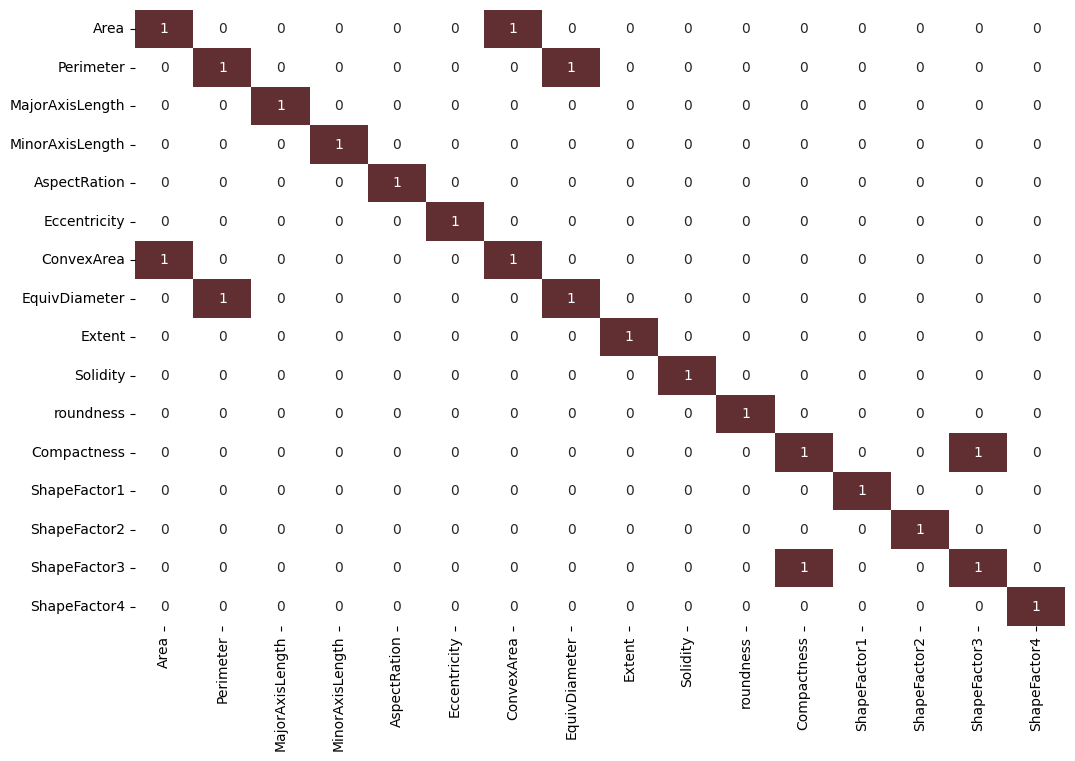

In [18]:
plt.figure(figsize=(12, 8))
colors2 = ["white", "#612E32"]
custom_cmap2 = LinearSegmentedColormap.from_list("custom_cmap", colors2)
sns.heatmap(abs(corr_matrix) > 0.99, annot=True, cmap=custom_cmap2, cbar=False)
plt.show()

In [19]:
mean_corr = abs(corr_matrix.mean(axis=1)).sort_values(ascending=False)
mean_corr

MinorAxisLength    0.228592
Area               0.215992
ConvexArea         0.214591
EquivDiameter      0.199603
ShapeFactor1       0.198780
Perimeter          0.177487
MajorAxisLength    0.157014
Extent             0.123622
Solidity           0.103992
AspectRation       0.061897
roundness          0.060404
Compactness        0.059423
ShapeFactor3       0.058127
ShapeFactor4       0.054719
Eccentricity       0.052820
ShapeFactor2       0.043097
dtype: float64

In [20]:
class_corr = abs(dry_bean.corr(numeric_only=True)['Class_num']).sort_values(ascending=False)
class_corr

Class_num          1.000000
Perimeter          0.508315
EquivDiameter      0.481452
ConvexArea         0.477624
Area               0.475413
MinorAxisLength    0.458347
MajorAxisLength    0.456515
ShapeFactor1       0.391842
roundness          0.388505
ShapeFactor2       0.337656
Solidity           0.323356
Eccentricity       0.202824
ShapeFactor3       0.170656
ShapeFactor4       0.167118
Compactness        0.159293
AspectRation       0.119588
Extent             0.030855
Name: Class_num, dtype: float64

In [21]:
dry_bean_finalfeature = dry_bean.drop(columns=['Area', 'EquivDiameter', 'Compactness'], axis=1)

### Feature Selection Using 10 Different Methods

In this section, **10 different methods** were used to evaluate feature importance. These methods include the following:

1. **Random Forest**: Using Random Forest algorithm to compute feature importance.
2. **XGBoost**: Using XGBoost model to determine feature importance.
3. **Lasso**: Using Lasso regression for feature selection based on coefficients.
4. **RF_RFE**: Using Recursive Feature Elimination (RFE) with Random Forest algorithm.
5. **XGB_RFE**: Using RFE with XGBoost model.
6. **Lasso_RFE**: Using RFE with Lasso regression.
7. **LR_RFE**: Using RFE with Linear Regression.
8. **F1_score**: Using F1-score criterion for feature selection.
9. **MI_score**: Using Mutual Information score for feature evaluation.
10. **CHI2_score**: Using Chi-square test for feature selection.

For each of these methods, feature importance was calculated and placed side by side in a table. Then, the average rank of each feature across all methods was calculated, and a line plot was drawn to visualize these averages.

In this plot, a **sharp break** was observed between the seventh and eighth features, indicating a **large difference** in their average ranks. Finally, the top seven features were selected as the **most important features** for the model.

The selected features are:
- **'Perimeter'**
- **'ConvexArea'**
- **'ShapeFactor1'**
- **'ShapeFactor3'**
- **'ShapeFactor2'**
- **'MajorAxisLength'**
- **'MinorAxisLength'**



In [22]:
X_selection = dry_bean_finalfeature.drop(columns=['Class', 'Class_num'])
y_selection = dry_bean_finalfeature['Class_num']
feature_names = X_selection.columns
scaler = MinMaxScaler()
X_selection = scaler.fit_transform(X_selection)
X_selection = pd.DataFrame(X_selection, columns=feature_names)

rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lasso = LassoCV(cv=5)
rf_RFE = RFE(rf, n_features_to_select=1, step=1) 
xgb_RFE = RFE(xgb, n_features_to_select=1, step=1) 
lasso_RFE = RFE(lasso, n_features_to_select=1, step=1) 
lr_RFE = RFE(LinearRegression(), n_features_to_select=1, step=1) 
f_score = SelectKBest(score_func=f_classif, k='all')
mi_score = SelectKBest(score_func=mutual_info_classif, k='all')
chi2_score = SelectKBest(score_func=chi2, k='all')

rf.fit(X_selection, y_selection)
xgb.fit(X_selection, y_selection)
lasso.fit(X_selection, y_selection)
rf_RFE.fit(X_selection, y_selection)
xgb_RFE.fit(X_selection, y_selection)
lasso_RFE.fit(X_selection, y_selection)
lr_RFE.fit(X_selection, y_selection)
f_score.fit(X_selection, y_selection)
mi_score.fit(X_selection, y_selection)
chi2_score.fit(X_selection, y_selection)


rf_rank = np.argsort(rf.feature_importances_)[::-1] 
xgb_rank = np.argsort(xgb.feature_importances_)[::-1]  
lasso_rank = np.argsort(np.abs(lasso.coef_))[::-1]
rf_RFE_rank = rf_RFE.ranking_
xgb_RFE_rank = xgb_RFE.ranking_
lasso_RFE_rank = lasso_RFE.ranking_
lr_RFE_rank = lr_RFE.ranking_
f_score_rank = np.argsort(f_score.scores_)[::-1]
mi_score_rank = np.argsort(mi_score.scores_)[::-1]
chi2_score_rank = np.argsort(chi2_score.scores_)[::-1]

feature_names = X_selection.columns
rf_rank_dict = {name: rank+1 for rank, name in enumerate(feature_names[rf_rank])}
xgb_rank_dict = {name: rank+1 for rank, name in enumerate(feature_names[xgb_rank])}
lasso_rank_dict = {name: rank+1 for rank, name in enumerate(feature_names[lasso_rank])}
rf_RFE_dict = {name: rank for rank, name in zip(rf_RFE_rank, feature_names)}
xgb_RFE_dict = {name: rank for rank, name in zip(xgb_RFE_rank, feature_names)}
lasso_RFE_dict = {name: rank for rank, name in zip(lasso_RFE_rank, feature_names)}
lr_RFE_dict = {name: rank for rank, name in zip(lr_RFE_rank, feature_names)}
f_rank_dict = {name: rank+1 for rank, name in enumerate(feature_names[f_score_rank])}
mi_rank_dict = {name: rank+1 for rank, name in enumerate(feature_names[mi_score_rank])}
chi2_rank_dict = {name: rank+1 for rank, name in enumerate(feature_names[chi2_score_rank])}

df_feature_rank = pd.DataFrame({
    'Feature': feature_names,
    'RF': [rf_rank_dict.get(feature, np.nan) for feature in feature_names],
    'XGB': [xgb_rank_dict.get(feature, np.nan) for feature in feature_names],
    'Lasso': [lasso_rank_dict.get(feature, np.nan) for feature in feature_names],
    'RF_RFE': [rf_RFE_dict.get(feature, np.nan) for feature in feature_names],
    'XGB_RFE': [xgb_RFE_dict.get(feature, np.nan) for feature in feature_names],
    'Lasso_RFE': [lasso_RFE_dict.get(feature, np.nan) for feature in feature_names],
    'LR_RFE': [lr_RFE_dict.get(feature, np.nan) for feature in feature_names],
    'F1_score': [f_rank_dict.get(feature, np.nan) for feature in feature_names],
    'MI_score': [mi_rank_dict.get(feature, np.nan) for feature in feature_names],
    'CHI2_score': [chi2_rank_dict.get(feature, np.nan) for feature in feature_names]

})
df_feature_rank['Average_Rank'] = df_feature_rank[['RF', 'XGB', 'F1_score', 'Lasso', 'MI_score', 'RF_RFE', 'XGB_RFE', 'Lasso_RFE', 'LR_RFE', 'CHI2_score']].mean(axis=1)
df_feature_rank = df_feature_rank.sort_values(by='Average_Rank', ascending=True).reset_index(drop=True)


c:\Users\eftekhari\Desktop\DataScienseTest\Chapter4\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.670222904856928, tolerance: 3.259104965848255
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\eftekhari\Desktop\DataScienseTest\Chapter4\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.456299430512445, tolerance: 3.259104965848255
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\eftekhari\Desktop\DataScienseTest\Chapter4\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.31875956982549, tolerance: 3.259104965848255
  model = cd_fast.enet_coordinate_descent_

In [23]:
df_feature_rank

,Feature,RF,XGB,Lasso,RF_RFE,XGB_RFE,Lasso_RFE,LR_RFE,F1_score,MI_score,CHI2_score,Average_Rank
0,Perimeter,1,5,1,3,5,1,1,2,1,3,2.3
1,ConvexArea,6,2,9,7,1,9,2,1,2,1,4.0
2,ShapeFactor1,2,3,5,2,3,5,6,6,5,8,4.5
3,ShapeFactor3,4,1,3,1,2,3,12,8,7,7,4.8
4,ShapeFactor2,9,8,4,10,7,4,3,5,4,4,5.8
5,MajorAxisLength,5,4,13,4,4,13,7,4,3,2,5.9
6,MinorAxisLength,3,7,12,5,8,12,5,3,6,5,6.6
7,roundness,10,6,6,9,6,6,10,10,10,10,8.3
8,AspectRation,7,10,11,6,10,11,8,7,9,6,8.5
9,ShapeFactor4,11,9,2,11,9,2,9,11,11,12,8.7


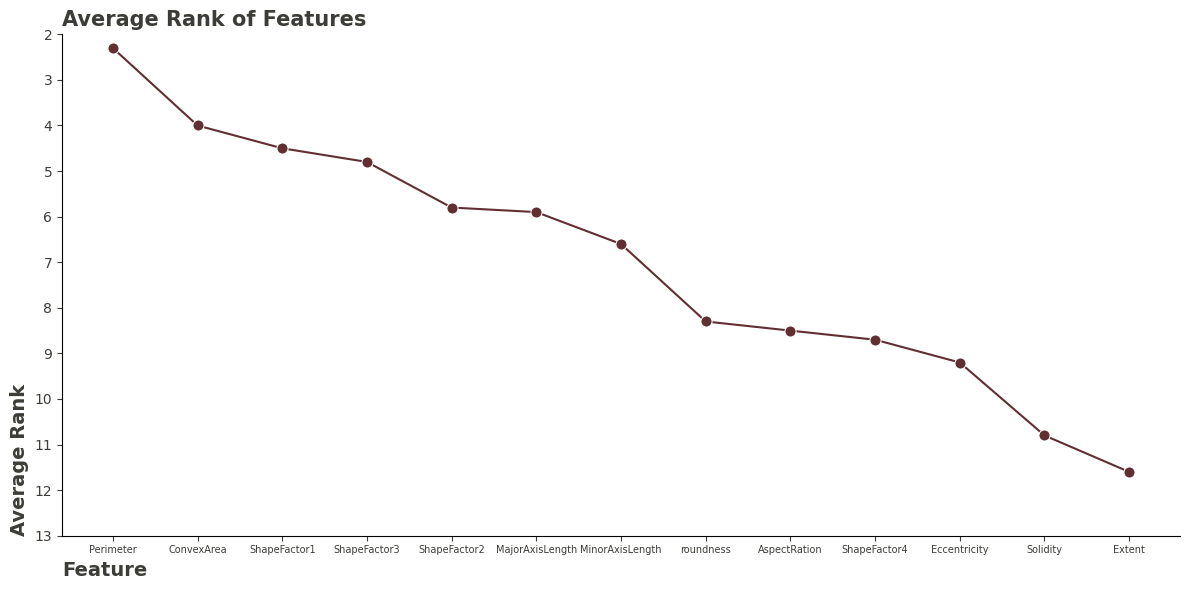

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Feature', y='Average_Rank', data=df_feature_rank, marker='o', color='#612E32', markersize=8)
plt.ylim(2, 13)
plt.yticks(range(2, 14, 1))
plt.gca().invert_yaxis()
plt.title('Average Rank of Features', 
          weight="bold",
          color="#3C3D37",
          fontsize=15,
          loc="left")
plt.xlabel('Feature',
           loc="left",
           weight="bold",
           fontsize=14,
           color="#3C3D37")
plt.ylabel('Average Rank',
           loc="bottom",
           weight="bold",
           fontsize=14,
           color="#3C3D37")
ax.tick_params(axis='x', colors='#3C3D37')
ax.tick_params(axis='y', colors='#3C3D37')
plt.xticks(fontsize=7)
sns.despine()
plt.tight_layout()
plt.show()


In [25]:
dry_bean_finalfeature = dry_bean[[
    'Perimeter',
    'ConvexArea', 
    'ShapeFactor1',
    'ShapeFactor3', 
    'ShapeFactor2',  
    'MajorAxisLength', 
    'MinorAxisLength',
    'Class',
    'Class_num'
    ]]

dry_bean_finalfeature

,Perimeter,ConvexArea,ShapeFactor1,ShapeFactor3,ShapeFactor2,MajorAxisLength,MinorAxisLength,Class,Class_num
0,610.291,28715,0.007332,0.834222,0.003147,208.178117,173.888747,SEKER,5
1,638.018,29172,0.006979,0.909851,0.003564,200.524796,182.734419,SEKER,5
2,624.110,29690,0.007244,0.825871,0.003048,212.826130,175.931143,SEKER,5
3,645.884,30724,0.007017,0.861794,0.003215,210.557999,182.516516,SEKER,5
4,620.134,30417,0.006697,0.941900,0.003665,201.847882,190.279279,SEKER,5
...,...,...,...,...,...,...,...,...,...
13606,759.696,42508,0.006858,0.642988,0.001749,288.721612,185.944705,DERMASON,3
13607,757.499,42494,0.006688,0.676099,0.001886,281.576392,190.713136,DERMASON,3
13608,759.321,42569,0.006681,0.676884,0.001888,281.539928,191.187979,DERMASON,3
13609,763.779,42667,0.006724,0.668237,0.001852,283.382636,190.275731,DERMASON,3


# Visualizing Final Feature Relationships 

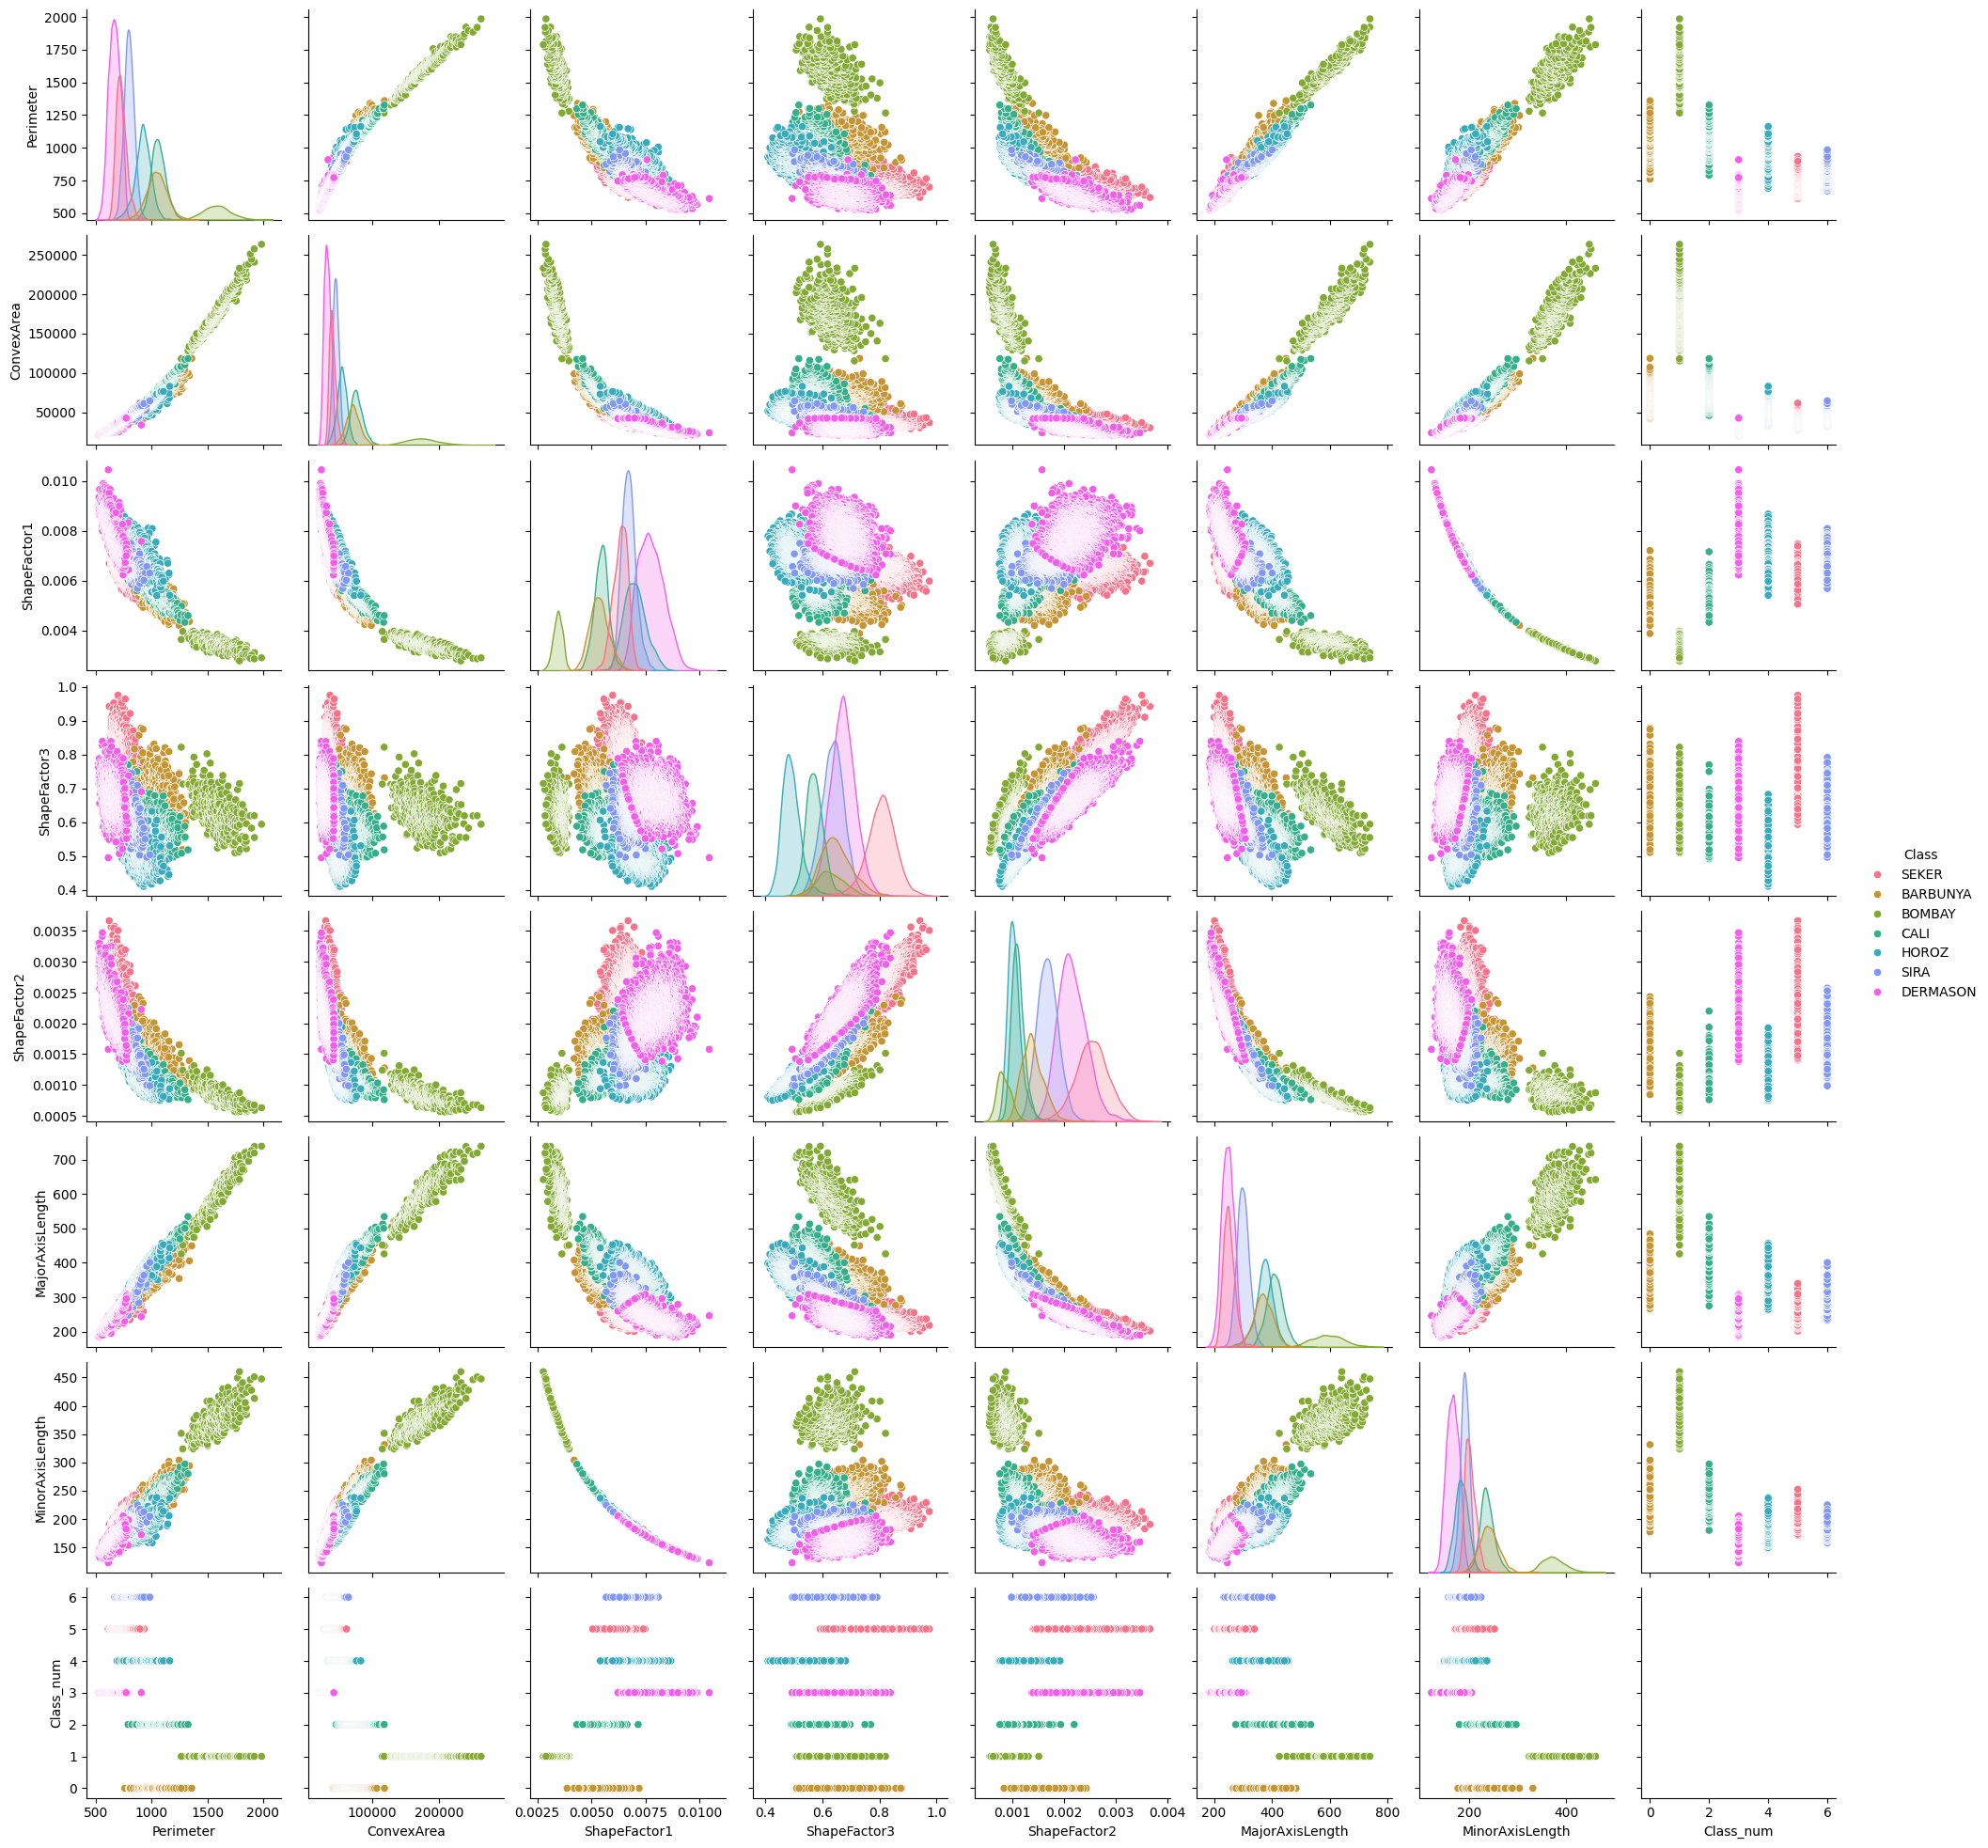

In [26]:
sns.pairplot(dry_bean_finalfeature, hue="Class", palette="husl")
plt.show()

# Data Preprocessing and Train-Test Split

In this section, the data is scaled to the range [0, 1] using **MinMaxScaler**. 

Then, the data is split into training and testing sets. 80% of the data is used for training, and 20% for testing. The split is done randomly, and **stratified sampling** is used to ensure that the class distribution is maintained in both the training and test sets.

Finaly, the class distribution in the training and testing sets is examined. The provided code shows that the distribution of classes is similar in both the training and testing sets. The counts of samples in each class are compared, demonstrating that the class distribution is balanced across both sets.

In [27]:
X = dry_bean_finalfeature.drop(columns=['Class', 'Class_num'], axis=1)
y = dry_bean_finalfeature['Class_num']

In [28]:
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

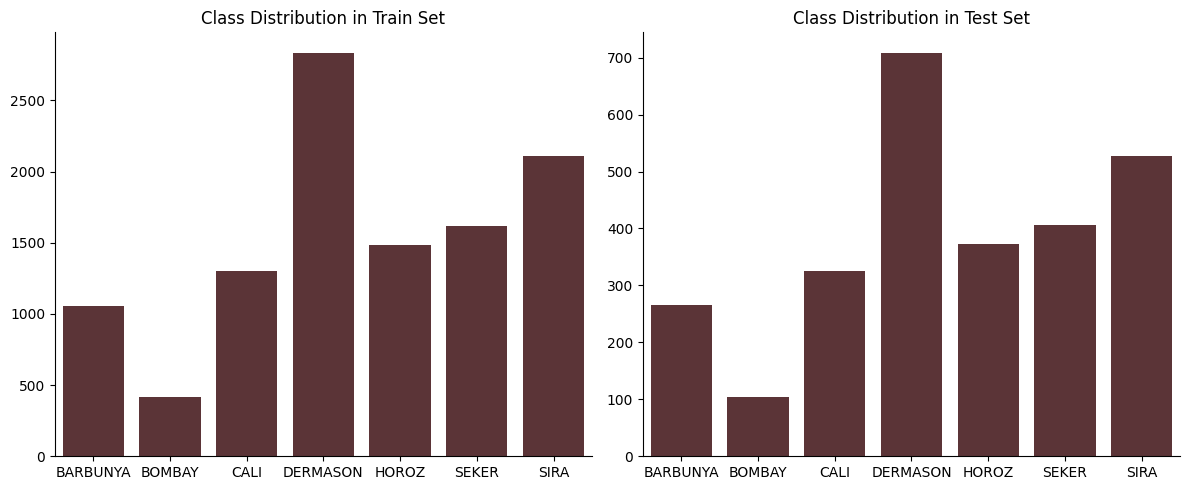

In [30]:
train_class_counts = pd.Series(y_train).value_counts().sort_index()
test_class_counts = pd.Series(y_test).value_counts().sort_index()
train_class_counts.index = [list(class_mapping.keys())[list(class_mapping.values()).index(i)] for i in train_class_counts.index]
test_class_counts.index = [list(class_mapping.keys())[list(class_mapping.values()).index(i)] for i in test_class_counts.index]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=train_class_counts.index, y=train_class_counts.values, color="#612E32")
plt.title("Class Distribution in Train Set")
plt.xlabel('')
sns.despine()

plt.subplot(1, 2, 2)
sns.barplot(x=test_class_counts.index, y=test_class_counts.values, color="#612E32")
plt.title("Class Distribution in Test Set")
plt.xlabel('')
sns.despine()

plt.tight_layout()
plt.show()

# Addressing Class Imbalance

**Class Balancing Using SMOTE Method**

In many classification problems, there can be an imbalance in the distribution of classes, where certain classes have fewer samples than others. This imbalance can cause problems with the performance of models. One common method to address this issue is **SMOTE** (Synthetic Minority Over-sampling Technique), which balances the class distribution by generating synthetic samples for the underrepresented classes.

In this section, SMOTE was used to balance the classes. This method equalized the number of samples in each class and created synthetic samples for the classes with fewer instances.

Finally, the distributions of the selected 7 features before and after applying SMOTE were compared. The plots below show that there was no significant change in the distributions, meaning that after SMOTE, the feature distributions remained similar.

In [31]:
smote = SMOTE(random_state=42, sampling_strategy='auto') 

In [32]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

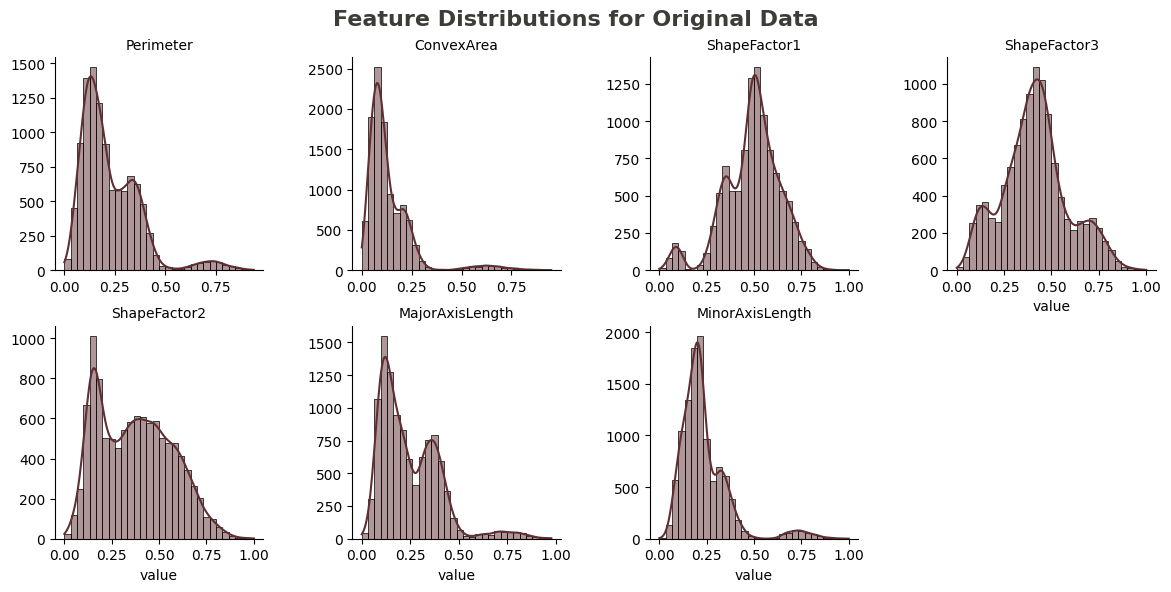

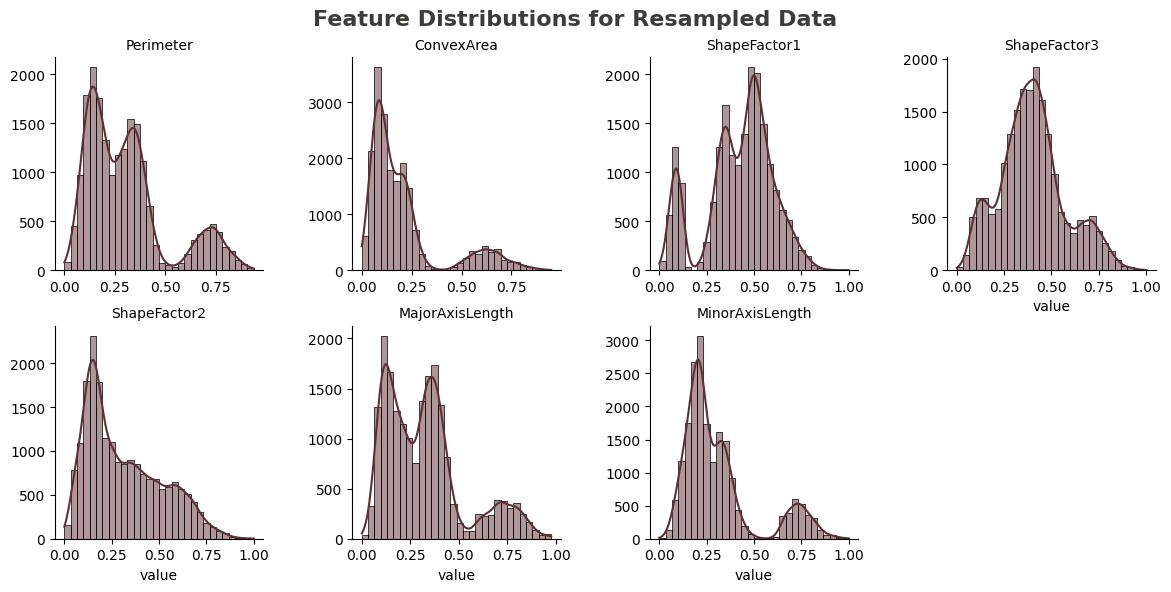

In [33]:
X_train_df = pd.DataFrame(X_train, columns=dry_bean_finalfeature.drop(columns=["Class", "Class_num"], axis=1).columns)
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=dry_bean_finalfeature.drop(columns=["Class", "Class_num"], axis=1).columns)

g1 = sns.FacetGrid(X_train_df.melt(), col="variable", col_wrap=4, sharex=False, sharey=False)
g1.map_dataframe(sns.histplot, x="value", kde=True, bins=30, color="#612E32")
g1.set(ylabel=None)
g1.set_titles("{col_name}")
g1.fig.suptitle("Feature Distributions for Original Data", fontsize=16, weight='bold', color="#3C3D37")
g1.fig.subplots_adjust(top=0.9)

g2 = sns.FacetGrid(X_train_resampled_df.melt(), col="variable", col_wrap=4, sharex=False, sharey=False)
g2.map_dataframe(sns.histplot, x="value", kde=True, bins=30, color="#612E32")
g2.set(ylabel=None)
g2.set_titles("{col_name}")
g2.fig.suptitle("Feature Distributions for Resampled Data", fontsize=16, weight='bold', color="#3C3D37")
g2.fig.subplots_adjust(top=0.9)


plt.show()

# Number of Data in Train and Test

In [34]:
print(f"number of data in train set: {y_train_resampled.shape[0]}")
print(f"number of data in test set:  {y_test.shape[0]}")

number of data in train set: 19859
number of data in test set:  2709


# Saving Data

In this section, the input data and labels for the training and testing sets were saved as CSV files. This was done to allow easy access to the data for use in models in later stages and to avoid redoing preprocessing and resampling steps.

In [35]:
X_train_save = pd.DataFrame(X_train_resampled)
X_train_save.to_csv('traintest\X_train.csv', index=False)

y_train_save = pd.DataFrame(y_train_resampled)
y_train_save.to_csv('traintest\y_train.csv', index=False)

X_test_save = pd.DataFrame(X_test)
X_test_save.to_csv('traintest\X_test.csv', index=False)

y_test_save = pd.DataFrame(y_test)
y_test_save.to_csv('traintest\y_test.csv', index=False)